## Тренировка линейного классификатора

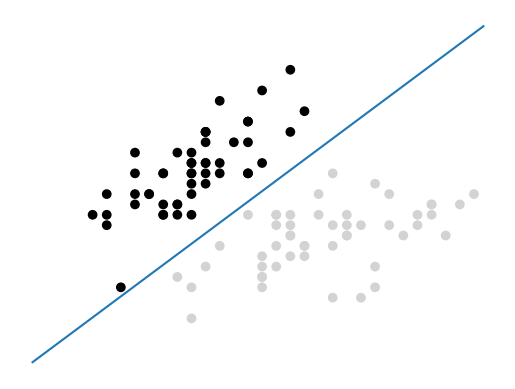

In [4]:
# Требуется натренировать модель чтобы классифицировать наблюдения
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris()
features = iris.data[:100,:2]
target = iris.target[:100]

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

svc = LinearSVC(C=1.0)

model = svc.fit(features_standardized, target)

from matplotlib import pyplot as plt
color = ["black" if c == 0 else "lightgrey" for c in target]
plt.scatter(features_standardized[:,0],
           features_standardized[:,1], c=color)

# Создать гиперплоскость
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5,2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

# Начертить гиперплоскость
plt.plot(xx, yy)
plt.axis("off")
plt.show()

## Обработка линейно неразделимых классов с помощью ядер

In [6]:
# Требуется натренировать опорно-векторный классификатор, но ваши классы линейно неразделимы
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

np.random.seed(0)

features = np.random.randn(200,2)

target_xor = np.logical_xor(features[:,0]>0,features[:,1]>0)
target = np.where(target_xor, 0, 1)

# Создать опорно-векторную машину с радиально-базисным функциональным ядром
svc = SVC(kernel = "rbf", random_state = 0, gamma=1, C=1)

# Натренировать классификатор
model = svc.fit(features, target)

## Создание предсказанных вероятностей

In [7]:
# Требуется узнать предсказанные вероятности класса для наблюдения
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris()
features = iris.data
target = iris.target

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Создать объект опорно-векторного классификатора
svc = SVC(kernel='linear', probability=True, random_state=0)

model = svc.fit(features_standardized, target)

new_observation = [[.4,.4,.4,.4]]

model.predict_proba(new_observation)

array([[0.00541761, 0.97348825, 0.02109414]])

## Идентификация опорных векторов

In [9]:
# Требуется определить, какие наблюдения являются опорными векторами гиперплоскости решения
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

svc = SVC(kernel='linear', random_state=0)

model = svc.fit(features_standardized, target)

model.support_vectors_

array([[-0.5810659 ,  0.42196824, -0.80497402, -0.50860702],
       [-1.52079513, -1.67737625, -1.08231219, -0.86427627],
       [-0.89430898, -1.4674418 ,  0.30437864,  0.38056609],
       [-0.5810659 , -1.25750735,  0.09637501,  0.55840072]])

In [10]:
model.support_

array([23, 41, 57, 98], dtype=int32)

In [11]:
model.n_support_

array([2, 2], dtype=int32)